In [66]:
from tensorflow.keras.models import load_model

# Load the model but recompile it to reset the optimizer
model = load_model("model.keras", compile=False)

print("✅ Model loaded successfully!")



✅ Model loaded successfully!


In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
import os

# Load the validation dataset
val_data_path = "../gtsrb-preprocessed/X_val.npy"
val_labels_path = "../gtsrb-preprocessed/y_val.npy"

if os.path.exists(val_data_path) and os.path.exists(val_labels_path):
    print("✅ Validation dataset found! Proceeding to create test dataset.")
    
    # Load data
    X_val = np.load(val_data_path)
    y_val = np.load(val_labels_path)

    # Check if all classes have at least 2 samples
    unique, counts = np.unique(y_val, return_counts=True)
    min_count = np.min(counts)

    if min_count >= 2:
        # Safe to use stratification
        print("✅ Using stratified split (All classes have at least 2 samples).")
        X_val, X_test, y_val, y_test = train_test_split(
            X_val, y_val, test_size=0.2, stratify=y_val, random_state=42
        )
    else:
        # Fallback: Random split without stratification
        X_val, X_test, y_val, y_test = train_test_split(
            X_val, y_val, test_size=0.2, random_state=42
        )

    # Ensure the test directory exists
    test_dir = "../gtsrb-preprocessed/test/"
    os.makedirs(test_dir, exist_ok=True)

    # Save the test dataset inside the test folder
    np.save(test_dir + "X_test.npy", X_test)
    np.save(test_dir + "y_test.npy", y_test)

    print(f"✅ Test dataset recreated successfully! Test size: {X_test.shape[0]}")
else:
    print("❌ Validation dataset not found! Ensure `X_val.npy` and `y_val.npy` exist.")


✅ Validation dataset found! Proceeding to create test dataset.
✅ Test dataset recreated successfully! Test size: 9


In [68]:
import numpy as np

y_test = np.load("../gtsrb-preprocessed/test/y_test.npy")
unique, counts = np.unique(y_test, return_counts=True)

print("Class distribution in y_test:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")


Class distribution in y_test:
Class 10: 1 samples
Class 12: 1 samples
Class 21: 1 samples
Class 28: 1 samples
Class 29: 1 samples
Class 30: 1 samples
Class 32: 1 samples
Class 33: 1 samples
Class 36: 1 samples


In [69]:
import numpy as np

# Load test dataset
X_test = np.load("../gtsrb-preprocessed/test/X_test.npy")
y_test = np.load("../gtsrb-preprocessed/test/y_test.npy")

print(f"📂 Test data loaded! Shape: {X_test.shape}, {y_test.shape}")


📂 Test data loaded! Shape: (9, 48, 48, 3), (9,)


In [70]:
from tensorflow.keras.utils import to_categorical

# Define the number of classes
num_classes = 43  # Adjust based on your dataset

# Convert y_test to one-hot encoding
y_test = to_categorical(y_test, num_classes)

print("✅ y_test converted to one-hot encoding!")


✅ y_test converted to one-hot encoding!


In [71]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print("✅ Model compiled successfully!")


✅ Model compiled successfully!


In [72]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"📝 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8889 - loss: 0.8580
📝 Test Loss: 0.8580
✅ Test Accuracy: 88.8889%


In [73]:
y_pred = model.predict(X_test)  # Get probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

print("✅ Predictions generated!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
✅ Predictions generated!


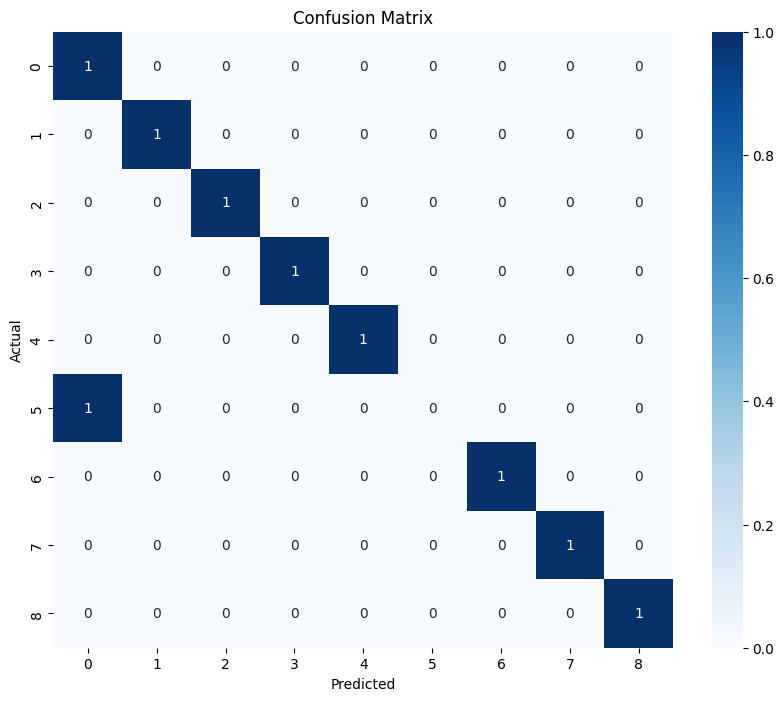

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [75]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Convert accuracy to percentage format
accuracy_percent = round(accuracy * 100, 2)

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Accuracy", f"{accuracy_percent}%"])
table.add_row(["Loss", f"{loss:.4f}"])

# Print the table
print("\n📊 Model Evaluation Results\n")
print(table)



📊 Model Evaluation Results

+----------+--------+
|  Metric  | Value  |
+----------+--------+
| Accuracy | 88.89% |
|   Loss   | 0.8580 |
+----------+--------+
